___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)



Epoch 1/200


6/6 [==============================] - 1s 2ms/step - loss: 0.6293 - accuracy: 0.6723
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.6741
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6211 - accuracy: 0.6778
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.6797
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.6816
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.6872
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6909
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.6927
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.6965
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5973 - accuracy: 0.6965
Epoch 11/200
6/6 [=======

6/6 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7616
Epoch 77/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.7616
Epoch 78/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7598
Epoch 79/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7598
Epoch 80/200
6/6 [==============================] - 0s 997us/step - loss: 0.5033 - accuracy: 0.7579
Epoch 81/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7579
Epoch 82/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7598
Epoch 83/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7598
Epoch 84/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5009 - accuracy: 0.7561
Epoch 85/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.7561
Epoch 86/200
6/6 [=============

6/6 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7635
Epoch 160/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7635
Epoch 161/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7635
Epoch 162/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7635
Epoch 163/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7635
Epoch 164/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7635
Epoch 165/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7654
Epoch 166/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7654
Epoch 167/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.7654
Epoch 168/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7654
Epoch 169/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

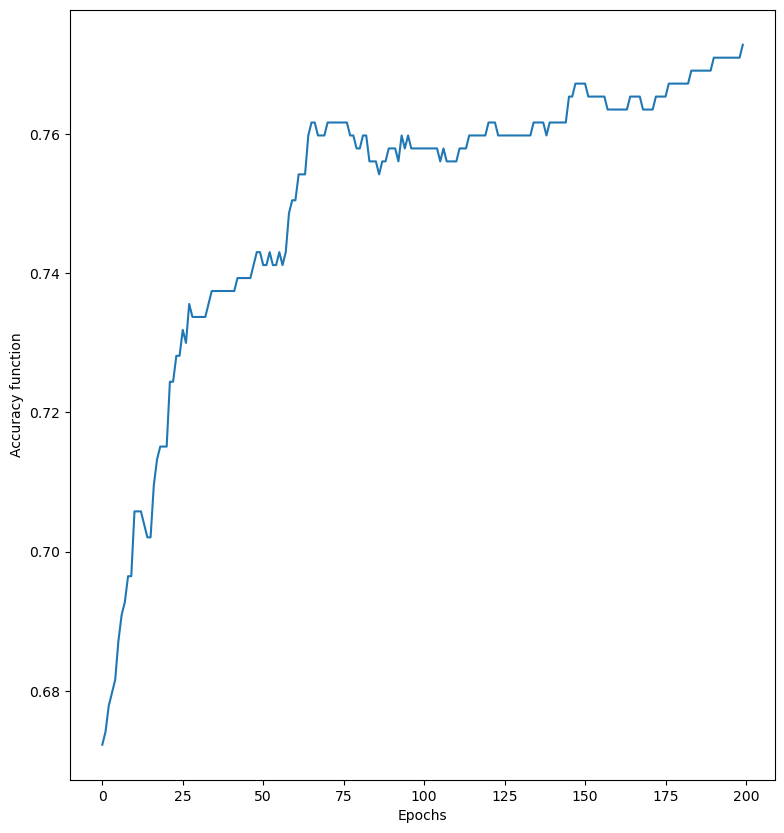

In [8]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 712us/step


In [10]:
Y_pred

array([[0.28481692],
       [0.1317891 ],
       [0.12911722],
       [0.31347057],
       [0.6365589 ],
       [0.56976473],
       [0.03613798],
       [0.4007766 ],
       [0.6095083 ],
       [0.75841963],
       [0.23729028],
       [0.8102257 ],
       [0.3610097 ],
       [0.40631258],
       [0.07306206],
       [0.325248  ],
       [0.09703205],
       [0.06065583],
       [0.5562049 ],
       [0.5355763 ],
       [0.3001885 ],
       [0.08258382],
       [0.35392177],
       [0.09233338],
       [0.5556792 ],
       [0.8351015 ],
       [0.0764158 ],
       [0.04994192],
       [0.29066905],
       [0.14042038],
       [0.83607894],
       [0.801161  ],
       [0.75705945],
       [0.63221353],
       [0.79802096],
       [0.6936594 ],
       [0.66613185],
       [0.33604926],
       [0.4181932 ],
       [0.4749025 ],
       [0.05538395],
       [0.62291944],
       [0.58896077],
       [0.35910207],
       [0.05528942],
       [0.63021415],
       [0.6019034 ],
       [0.157

In [11]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientras más grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 712us/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.773 	 0.692 	 0.633
  Test 	 0.732 	 0.622 	 0.575


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [22]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [23]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = to_categorical(Y).astype(int)

In [27]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [28]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [29]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#salida

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='binary_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 0s 167ms/step - loss: 0.9170 - accuracy: 0.3250 - val_loss: 0.5974 - val_accuracy: 0.7000
Epoch 2/200
2/2 [==============================] - 0s 25ms/step - loss: 0.6248 - accuracy: 0.5750 - val_loss: 0.6386 - val_accuracy: 0.3000
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 0.6069 - accuracy: 0.3750 - val_loss: 0.5201 - val_accuracy: 0.3667
Epoch 4/200
2/2 [==============================] - 0s 24ms/step - loss: 0.5348 - accuracy: 0.3250 - val_loss: 0.5285 - val_accuracy: 0.3667
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 0.5466 - accuracy: 0.3250 - val_loss: 0.4810 - val_accuracy: 0.4000
Epoch 6/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4890 - accuracy: 0.4583 - val_loss: 0.4469 - val_accuracy: 0.7667
Epoch 7/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4475 - accuracy: 0.8083 - val_loss: 0.4149 - val_accuracy: 0.8000
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 24ms/step - loss: 0.2626 - accuracy: 0.9417 - val_loss: 0.2555 - val_accuracy: 0.9667
Epoch 60/200
2/2 [==============================] - 0s 27ms/step - loss: 0.2458 - accuracy: 0.9583 - val_loss: 0.2528 - val_accuracy: 0.9667
Epoch 61/200
2/2 [==============================] - 0s 24ms/step - loss: 0.2434 - accuracy: 0.9583 - val_loss: 0.2496 - val_accuracy: 0.9667
Epoch 62/200
2/2 [==============================] - 0s 24ms/step - loss: 0.2396 - accuracy: 0.9667 - val_loss: 0.2445 - val_accuracy: 0.9333
Epoch 63/200
2/2 [==============================] - 0s 23ms/step - loss: 0.2415 - accuracy: 0.9500 - val_loss: 0.2490 - val_accuracy: 0.9667
Epoch 64/200
2/2 [==============================] - 0s 24ms/step - loss: 0.2402 - accuracy: 0.9667 - val_loss: 0.2456 - val_accuracy: 0.9667
Epoch 65/200
2/2 [==============================] - 0s 25ms/step - loss: 0.2389 - accuracy: 0.9583 - val_loss: 0.2447 - val_accuracy: 0.8667
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 25ms/step - loss: 0.1435 - accuracy: 0.9500 - val_loss: 0.1736 - val_accuracy: 0.8667
Epoch 118/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1517 - accuracy: 0.9500 - val_loss: 0.1382 - val_accuracy: 0.9667
Epoch 119/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1330 - accuracy: 0.9583 - val_loss: 0.1349 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 24ms/step - loss: 0.1258 - accuracy: 0.9750 - val_loss: 0.1682 - val_accuracy: 0.8667
Epoch 121/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1468 - accuracy: 0.9250 - val_loss: 0.1406 - val_accuracy: 0.8667
Epoch 122/200
2/2 [==============================] - 0s 24ms/step - loss: 0.1254 - accuracy: 0.9583 - val_loss: 0.1288 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1162 - accuracy: 0.9833 - val_loss: 0.1284 - val_accuracy: 0.9667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 25ms/step - loss: 0.0585 - accuracy: 0.9833 - val_loss: 0.1168 - val_accuracy: 0.8667
Epoch 176/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0724 - accuracy: 0.9583 - val_loss: 0.0647 - val_accuracy: 0.9667
Epoch 177/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0751 - accuracy: 0.9667 - val_loss: 0.0968 - val_accuracy: 0.8667
Epoch 178/200
2/2 [==============================] - 0s 25ms/step - loss: 0.0852 - accuracy: 0.9500 - val_loss: 0.1121 - val_accuracy: 0.9333
Epoch 179/200
2/2 [==============================] - 0s 24ms/step - loss: 0.1298 - accuracy: 0.9250 - val_loss: 0.0986 - val_accuracy: 0.9333
Epoch 180/200
2/2 [==============================] - 0s 25ms/step - loss: 0.0998 - accuracy: 0.9500 - val_loss: 0.1461 - val_accuracy: 0.8667
Epoch 181/200
2/2 [==============================] - 0s 25ms/step - loss: 0.0778 - accuracy: 0.9417 - val_loss: 0.1024 - val_accuracy: 0.9333
Epoch 

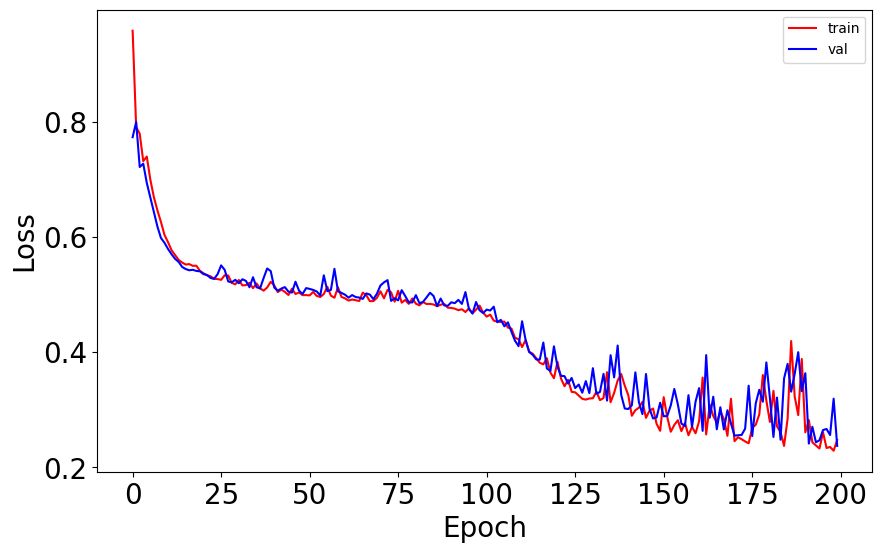

In [30]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [31]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 17ms/step


In [32]:
Y_pred

array([[2.4749446e-05, 9.8178792e-01, 1.8187394e-02],
       [9.9999380e-01, 6.1880778e-06, 1.0943781e-12],
       [2.5130121e-15, 6.6079114e-11, 1.0000000e+00],
       [4.9157381e-05, 9.6738183e-01, 3.2568980e-02],
       [9.3546078e-06, 9.9681574e-01, 3.1749280e-03],
       [9.9998820e-01, 1.1849399e-05, 5.3164422e-12],
       [1.4689572e-03, 9.9845362e-01, 7.7394834e-05],
       [1.1800021e-06, 2.1547610e-02, 9.7845125e-01],
       [1.4933510e-05, 2.8987044e-01, 7.1011466e-01],
       [1.0610142e-04, 9.9980766e-01, 8.6315464e-05],
       [3.5999567e-06, 5.8135170e-02, 9.4186121e-01],
       [9.9993980e-01, 6.0168935e-05, 8.3870674e-11],
       [9.9999869e-01, 1.3414974e-06, 2.2029694e-13],
       [9.9992764e-01, 7.2396833e-05, 8.5726683e-11],
       [9.9999630e-01, 3.7398981e-06, 1.8464130e-12],
       [2.9088043e-05, 9.9551481e-01, 4.4560567e-03],
       [6.6059054e-11, 4.0592994e-07, 9.9999964e-01],
       [4.4786495e-05, 9.9973983e-01, 2.1535948e-04],
       [6.0649731e-05, 9.227

In [33]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [34]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [35]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [36]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 19ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.967 	 0.970 	 0.967
  Test 	 0.967 	 0.969 	 0.967
